# 1. Functions, libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [3]:
df = pd.read_csv(r'..\Data\products.csv')

In [4]:
df.head(5)

,Product_ID,Product_desc,Product_type,Product_category,Product_subcategory,Width,Height,Product_color,Product_handle,Product_hinge,Product_packing,Product_batch,Product_costs
0,P0001,Frame_Industrial_Fire-rated_RAL7024_Aluminum (...,Frame,Industrial,Fire-rated,638.0,336.0,RAL7024,Aluminum (AL),Left,Cardbox,56,173.67
1,P0002,Frame_Industrial_Soundproof_RAL7024_Steel (ST)...,Frame,Industrial,Soundproof,621.0,1195.0,RAL7024,Steel (ST),Left,Wooden box,4,244.81
2,P0003,Frame_Residential_Exterior_RAL9005_Steel (ST)_...,Frame,Residential,Exterior,699.0,1143.0,RAL9005,Steel (ST),Left,Cardbox,84,121.27
3,P0004,Door_Commercial_Retail_RAL9005_Aluminum (AL)_L...,Door,Commercial,Retail,614.0,1493.0,RAL9005,Aluminum (AL),Left,Cardbox,22,216.81
4,P0005,Frame_Commercial_Warehouse_RAL7024_Aluminum (A...,Frame,Commercial,Warehouse,750.0,1275.0,RAL7024,Aluminum (AL),Left,Cardbox,99,108.44


# 3.EDA

## 3.1 NaN values

In [5]:
dataframe_info(df).sort_values(by = 'Missing Values', ascending = False)

,Column_name,Total records,Missing Values,Data type,Unique values
2,Product_type,300000,329,object,2
6,Height,300000,311,float64,1771
8,Product_handle,300000,307,object,3
3,Product_category,300000,302,object,5
5,Width,300000,300,float64,137
9,Product_hinge,300000,297,object,2
4,Product_subcategory,300000,290,object,15
7,Product_color,300000,288,object,3
10,Product_packing,300000,276,object,2
1,Product_desc,300000,0,object,299825


### 3.1.2 String NaN values

In [6]:
list_object_cols = list(df.select_dtypes('object').columns)
list_object_cols

['Product_ID',
 'Product_desc',
 'Product_type',
 'Product_category',
 'Product_subcategory',
 'Product_color',
 'Product_handle',
 'Product_hinge',
 'Product_packing']

In [7]:
df.loc[df.Product_handle.isna(),:]


,Product_ID,Product_desc,Product_type,Product_category,Product_subcategory,Width,Height,Product_color,Product_handle,Product_hinge,Product_packing,Product_batch,Product_costs
7,P0008,Door_Design_Glass-panel_RAL9005_Steel (ST)_Lef...,Door,Design,Glass-panel,710.0,1689.0,RAL9005,NaN,Left,Wooden box,53,162.02
1763,P1764,Door_Design_Classic_RAL9005_Plastic (PL)_Left_...,Door,Design,Classic,733.0,1164.0,RAL9005,NaN,Left,Cardbox,50,181.76
2197,P2198,Frame_Industrial_Soundproof_RAL7035_Aluminum (...,Frame,Industrial,Soundproof,675.0,1319.0,RAL7035,NaN,Right,Cardbox,69,155.70
2489,P2490,Frame_Design_Glass-panel_RAL7024_Steel (ST)_Le...,Frame,Design,Glass-panel,749.0,579.0,RAL7024,NaN,Left,Wooden box,82,132.62
4014,P4015,Frame_Security_Access-controlled_RAL9005_Plast...,Frame,Security,Access-controlled,745.0,1608.0,RAL9005,NaN,Right,Cardbox,82,125.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296887,P296888,Frame_Commercial_Warehouse_RAL9005_Plastic (PL...,Frame,Commercial,Warehouse,671.0,1582.0,RAL9005,NaN,Right,Cardbox,35,204.41
299113,P299114,Door_Residential_Interior_RAL9005_Steel (ST)_R...,Door,Residential,Interior,697.0,1648.0,RAL9005,NaN,Right,Wooden box,78,140.75
299486,P299487,Door_Residential_Interior_RAL7024_Plastic (PL)...,Door,Residential,Interior,670.0,344.0,RAL7024,NaN,Left,Wooden box,1,500.00
299698,P299699,Frame_Commercial_Office_RAL9005_Steel (ST)_Rig...,Frame,Commercial,Office,673.0,1719.0,RAL9005,NaN,Right,Cardbox,57,165.90


In [8]:
regex_mapping = {
    'Product_type': r'^([^_]+)',  
    'Product_category': r'^[^_]+_([^_]+)', 
    'Product_subcategory': r'^[^_]+_[^_]+_([^_]+)',  
    'Product_color': r'^[^_]+_[^_]+_[^_]+_([^_]+)',  
    'Product_handle': r'^[^_]+_[^_]+_[^_]+_[^_]+_([^_]+)',  
    'Product_hinge': r'^[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_([^_]+)', 
    'Product_packing': r'^[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_[^_]+_(.+)$'  
}

In [9]:
for col, regex in regex_mapping.items():
    if col in list_object_cols:
        df[col] = df[col].fillna(df['Product_desc'].str.extract(regex)[0])

In [10]:
dataframe_info(df).sort_values(by = 'Missing Values', ascending = False)

,Column_name,Total records,Missing Values,Data type,Unique values
6,Height,300000,311,float64,1771
5,Width,300000,300,float64,137
2,Product_type,300000,0,object,2
1,Product_desc,300000,0,object,299825
0,Product_ID,300000,0,object,300000
4,Product_subcategory,300000,0,object,15
3,Product_category,300000,0,object,5
7,Product_color,300000,0,object,3
8,Product_handle,300000,0,object,3
9,Product_hinge,300000,0,object,2


In [11]:
df.Product_handle.value_counts()

Product_handle
Plastic (PL)     100322
Aluminum (AL)    100026
Steel (ST)        99652
Name: count, dtype: int64

In [12]:
category_col = [
 'Product_type',
 'Product_category',
 'Product_subcategory',
 'Product_color',
 'Product_handle',
 'Product_hinge',
 'Product_packing']

for col in category_col:
    df[col] = df[col].astype('category')

### 3.1.2 Numeric NaN values

In [13]:
df.select_dtypes('number').columns

Index(['Width', 'Height', 'Product_batch', 'Product_costs'], dtype='object')

In [14]:
desc_nan_value_coles = ['Width', 'Height']
                        

In [15]:
dimensions_regex_mapping = {
    'Width': r'_(\d+)x\d+_',   # Extrahuje číslo před 'x'
    'Height': r'_\d+x(\d+)_'   # Extrahuje číslo za 'x'
}

In [16]:
for col, regex in dimensions_regex_mapping.items():
    if col in desc_nan_value_coles:
        df[col] = df[col].fillna(df['Product_desc'].str.extract(regex)[0])

In [17]:
cols_to_float = ['Width', 'Height', 'Product_batch', 'Product_costs']

for col in cols_to_float:
    df[col] = df[col].astype('float')

In [18]:
dataframe_info(df)

,Column_name,Total records,Missing Values,Data type,Unique values
0,Product_ID,300000,0,object,300000
1,Product_desc,300000,0,object,299825
2,Product_type,300000,0,category,2
3,Product_category,300000,0,category,5
4,Product_subcategory,300000,0,category,15
5,Width,300000,0,float64,137
6,Height,300000,0,float64,1771
7,Product_color,300000,0,category,3
8,Product_handle,300000,0,category,3
9,Product_hinge,300000,0,category,2


## 3.2 Basic statistics

In [19]:
df.describe()

,Width,Height,Product_batch,Product_costs
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,682.075287,1005.541970,50.521997,188.368322
std,39.631004,510.629604,28.866934,134.572824
min,614.000000,120.000000,1.000000,90.000000
25%,648.000000,564.000000,26.000000,137.150000
50%,682.000000,1006.000000,50.000000,175.070000
75%,716.000000,1447.000000,76.000000,212.850000
max,750.000000,1890.000000,100.000000,4929.140711


<Axes: xlabel='Product_batch'>

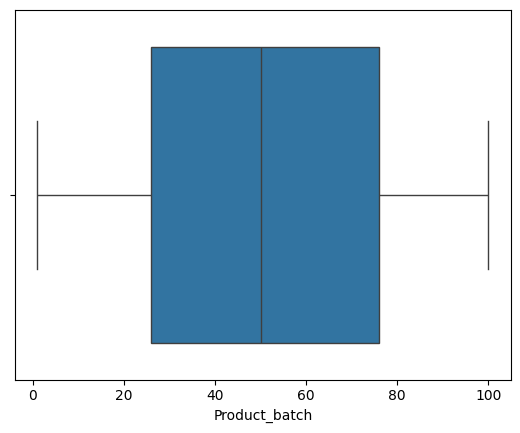

In [20]:
sns.boxplot(
    data = df,
    x='Product_batch'
            )

<Axes: xlabel='Product_costs'>

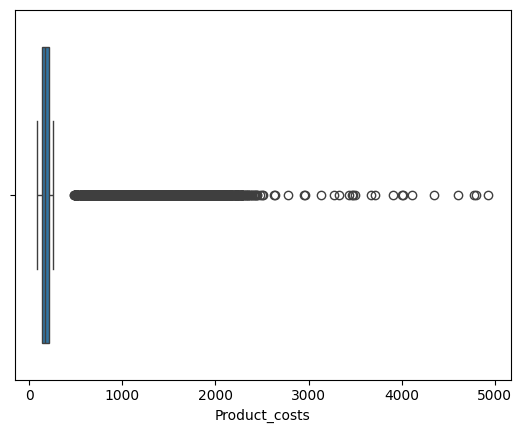

In [21]:
sns.boxplot(
    data = df,
    x='Product_costs'
            )

In [22]:
df_q_09 = df.loc[df['Product_costs']<=df['Product_costs'].quantile(0.90),:]
df_q_09['Product_costs'].describe()

count    270003.000000
mean        167.282958
std          39.580050
min          90.000000
25%         133.310000
50%         167.450000
75%         201.410000
max         235.620000
Name: Product_costs, dtype: float64

In [23]:
df_outliers = df.loc[df['Product_costs']>=235.62,:]
df_outliers

,Product_ID,Product_desc,Product_type,Product_category,Product_subcategory,Width,Height,Product_color,Product_handle,Product_hinge,Product_packing,Product_batch,Product_costs
1,P0002,Frame_Industrial_Soundproof_RAL7024_Steel (ST)...,Frame,Industrial,Soundproof,621.0,1195.0,RAL7024,Steel (ST),Left,Wooden box,4.0,244.810000
36,P0037,Door_Security_Bulletproof_RAL7035_Plastic (PL)...,Door,Security,Bulletproof,693.0,1496.0,RAL7035,Plastic (PL),Left,Cardbox,2.0,249.370000
41,P0042,Frame_Industrial_Soundproof_RAL7024_Steel (ST)...,Frame,Industrial,Soundproof,635.0,956.0,RAL7024,Steel (ST),Right,Cardbox,2.0,256.840000
43,P0044,Door_Industrial_Soundproof_RAL7024_Steel (ST)_...,Door,Industrial,Soundproof,674.0,265.0,RAL7024,Steel (ST),Left,Cardbox,13.0,239.160000
59,P0060,Frame_Design_Minimalist_RAL9005_Plastic (PL)_R...,Frame,Design,Minimalist,740.0,1192.0,RAL9005,Plastic (PL),Right,Wooden box,1.0,500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299948,P299949,Door_Security_Reinforced_RAL7035_Aluminum (AL)...,Door,Security,Reinforced,699.0,653.0,RAL7035,Aluminum (AL),Left,Cardbox,1.0,500.000000
299953,P299954,Frame_Commercial_Warehouse_RAL7024_Plastic (PL...,Frame,Commercial,Warehouse,654.0,188.0,RAL7024,Plastic (PL),Left,Cardbox,2.0,240.900000
299955,P299956,Frame_Design_Minimalist_RAL9005_Steel (ST)_Rig...,Frame,Design,Minimalist,702.0,826.0,RAL9005,Steel (ST),Right,Wooden box,3.0,236.200000
299970,P299971,Frame_Industrial_Fire-rated_RAL7024_Plastic (P...,Frame,Industrial,Fire-rated,621.0,1311.0,RAL7024,Plastic (PL),Right,Wooden box,63.0,1033.099206


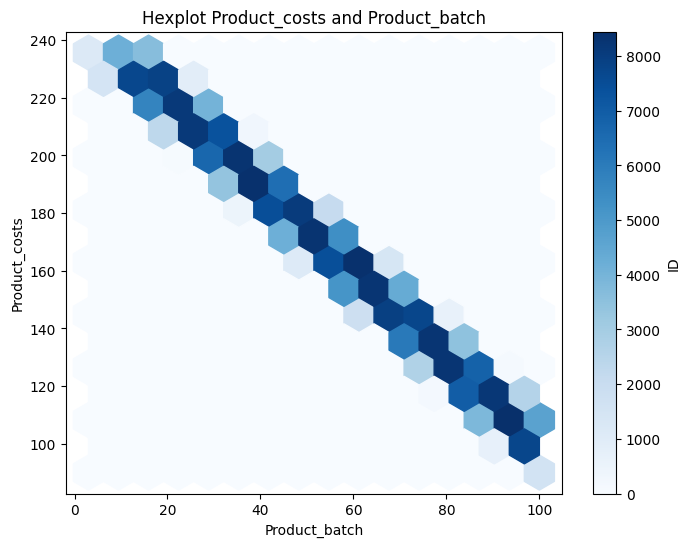

In [24]:

plt.figure(figsize=(8, 6))


plt.hexbin(df_q_09['Product_batch'], df_q_09['Product_costs'], gridsize=15, cmap='Blues')


plt.colorbar(label='ID')

# Přidání názvů os
plt.title('Hexplot Product_costs and Product_batch')
plt.xlabel('Product_batch')
plt.ylabel('Product_costs')

# Zobrazení grafu
plt.show()

# 4. Preprocessing

In [25]:
dataframe_info(df)

,Column_name,Total records,Missing Values,Data type,Unique values
0,Product_ID,300000,0,object,300000
1,Product_desc,300000,0,object,299825
2,Product_type,300000,0,category,2
3,Product_category,300000,0,category,5
4,Product_subcategory,300000,0,category,15
5,Width,300000,0,float64,137
6,Height,300000,0,float64,1771
7,Product_color,300000,0,category,3
8,Product_handle,300000,0,category,3
9,Product_hinge,300000,0,category,2


In [26]:
cols_one_hot_encode = list(df.select_dtypes('category').columns)
cols_one_hot_encode

['Product_type',
 'Product_category',
 'Product_subcategory',
 'Product_color',
 'Product_handle',
 'Product_hinge',
 'Product_packing']

In [27]:
df = pd.get_dummies(df, columns=cols_one_hot_encode, drop_first=True, dtype=int)

In [28]:
df = df.drop(columns=['Product_ID','Product_desc'])

# 5. TrainTest Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop(columns=['Product_costs'])
y = df['Product_costs']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [33]:
from scipy.stats import zscore

In [34]:
z_scores = zscore(y_train)

In [37]:
mask = np.abs(z_scores) < 3


In [38]:
X_train = X_train[mask]
y_train = y_train[mask]

# 6. Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_standardized = pd.DataFrame(scaler.fit_transform(X_train))
X_val_standardized = pd.DataFrame(scaler.transform(X_val))
X_test_standardized = pd.DataFrame(scaler.transform(X_test))
X_train_standardized.columns = X_train.columns
X_val_standardized.columns = X_val.columns
X_test_standardized.columns = X_test.columns

,Width,Height,Product_batch,Product_type_Frame,Product_category_Design,Product_category_Industrial,Product_category_Residential,Product_category_Security,Product_subcategory_Balcony,Product_subcategory_Bulletproof,...,Product_subcategory_Retail,Product_subcategory_Soundproof,Product_subcategory_Thermal-insulated,Product_subcategory_Warehouse,Product_color_RAL7035,Product_color_RAL9005,Product_handle_Plastic (PL),Product_handle_Steel (ST),Product_hinge_Right,Product_packing_Wooden box
0,0.023709,-1.258744,-1.162949,1.001653,-0.500709,2.004311,-0.499204,-0.500454,-0.267725,-0.268278,...,-0.266629,3.763653,-0.267838,-0.26875,-0.704759,-0.706708,1.411567,-0.705997,1.000884,-1.002845
1,0.301288,0.750876,-1.336245,-0.998349,-0.500709,-0.498924,-0.499204,-0.500454,-0.267725,-0.268278,...,-0.266629,-0.265699,-0.267838,-0.26875,1.418925,-0.706708,-0.708433,1.416438,-0.999116,0.997163
2,-1.086604,-1.260701,1.401831,-0.998349,-0.500709,2.004311,-0.499204,-0.500454,-0.267725,-0.268278,...,-0.266629,-0.265699,3.733603,-0.26875,-0.704759,-0.706708,1.411567,-0.705997,-0.999116,0.997163
3,-0.329572,1.478800,1.401831,1.001653,1.997170,-0.498924,-0.499204,-0.500454,-0.267725,-0.268278,...,-0.266629,-0.265699,-0.267838,-0.26875,1.418925,-0.706708,-0.708433,1.416438,1.000884,0.997163
4,1.335898,-1.125682,0.154100,-0.998349,1.997170,-0.498924,-0.499204,-0.500454,-0.267725,-0.268278,...,-0.266629,-0.265699,-0.267838,-0.26875,-0.704759,1.415012,-0.708433,1.416438,-0.999116,0.997163
